# 1. load_digits

## Library

In [1]:
import sklearn

print(sklearn.__version__)

1.3.0


In [9]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1.1 Data Load

In [14]:
digits = load_digits()

print(dir(digits))
print(digits.data.shape)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
(1797, 64)


In [32]:
# feature, target name 확인
print(digits.feature_names)
print(digits.target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


In [33]:
# data, target 지정
digits_data = digits.data
digits_label = digits.target

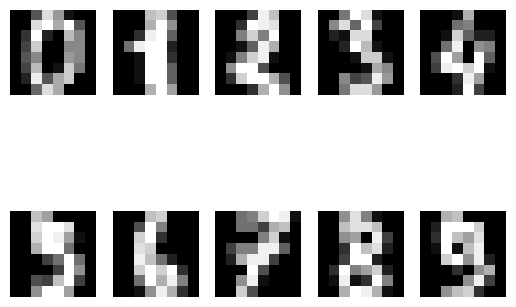

In [34]:
#data 이미지 확인
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    plt.axis('off') 
plt.show()

<Figure size 640x480 with 0 Axes>

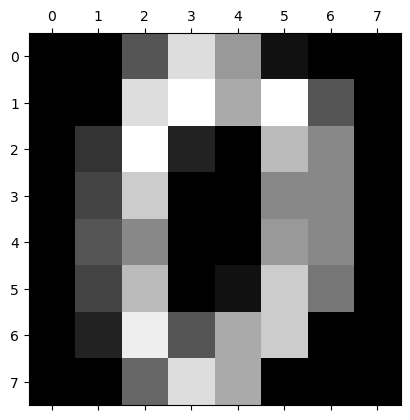

In [35]:
#data 이미지 낱개 확인
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

## 1.2 Modeling

### 1. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 모델 생성 및 훈련
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.87        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



### 2. RandomForest 

In [47]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### 3. SVM

In [48]:
from sklearn.svm import SVC

# SVM 모델 생성 및 훈련
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### 4. SGD Classifier

In [49]:
from sklearn.linear_model import SGDClassifier

# SGD 분류기 모델 생성 및 훈련
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
sgd_pred = sgd_model.predict(X_test)
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      0.96      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.93      0.91      0.92        47
           6       0.94      0.97      0.96        35
           7       0.97      0.97      0.97        34
           8       0.90      0.87      0.88        30
           9       0.90      0.93      0.91        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### 5. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 1.3 모델 평가

digits 데이터셋은 0~9까지의 숫자를 다중 분류하는 문제이기 때문에 특정 글자의 정확도보다는 전체적인 정답률이 중요한 데이터셋으로 <br/>
각 모델 별 Accuracy 점수를 비교하였을 때 아래와 같이 모델 성능을 확인할 수 있었습니다.

| Rank | Model                | Accuracy |
|------|----------------------|----------|
| 1    | SVM                  | 99%      |
| 2    | Logistic Regression  | 98%      |
| 3    | RandomForest         | 97%      |
| 4    | SGD Classifier       | 96%      |
| 5    | Decision Tree        | 86%      |


# 2. load_wine

## 2.1 Data load

In [93]:
from sklearn.datasets import load_wine

In [52]:
wine = load_wine()

print(dir(wine))
print(wine.data.shape)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
(178, 13)


In [54]:
# feature, target name 확인
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [92]:
# feature, target name 확인
wine_df = pd.DataFrame(data=wine.data, columns= wine.feature_names)
wine_df['label'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [78]:
# 데이터 특이값 확인
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [80]:
# 데이터 타입, null 확인
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [91]:
#데이터 불균형 확인
wine_df['label'].value_counts()

label
1    71
0    59
2    48
Name: count, dtype: int64

In [55]:
# data, target 지정
wine_data = wine.data
wine_label = wine.target

## 2.2 Modeling

In [63]:
from sklearn.tree import DecisionTreeClassifier

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=42)

### 1. Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 모델 생성 및 훈련
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### 2. RandomForest 

In [65]:

from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 3. SVM

In [66]:
from sklearn.svm import SVC

# SVM 모델 생성 및 훈련
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



### 4. SGD Classifier

In [67]:
from sklearn.linear_model import SGDClassifier

# SGD 분류기 모델 생성 및 훈련
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
sgd_pred = sgd_model.predict(X_test)
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.65      0.93      0.76        14
           2       0.00      0.00      0.00         8

    accuracy                           0.72        36
   macro avg       0.49      0.62      0.54        36
weighted avg       0.57      0.72      0.63        36



/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5. Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.3 모델 평가
wine 데이터셋은 class 1~3을 예측하는 다중 분류 데이터셋으로 분류하는 상황에 따라 특정 class를 중요하게 분류하는 경우 recall과 precision이 중요할 수 있으며<br/>
데이터 불균형 등 문제가 있을 때는 각 class 별 모델링을 진행할 수 있지만 이번 탐색에는 특별한 목적을 가지고 있지 않아 전체적인 분류 성능 확인을 위해 accuracy 점수를 확인하였을 떄 아래와 같이 모델의 성능을 확인할 수 있었습니다.

| Rank | Model                | Accuracy |
|------|----------------------|----------|
| 1    | RandomForest         | 100%     |
| 2    | Logistic Regression  | 97%      |
| 3    | Decision Tree        | 94%      |
| 4    | SVM                  | 81%      |
| 5    | SGD Classifier       | 72%      |

RF에서 별도 엔지니어링 없이 baseline만으로 100%로 월등하게 높은 성능이 확인됩니다.

# 3. load_breast_cancer

## 3.1 Data Load

In [69]:
from sklearn.datasets import load_breast_cancer

In [72]:
cancer = load_breast_cancer()

print(dir(cancer))
print(cancer.data.shape)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
(569, 30)


In [73]:
# feature, target name 확인
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [76]:
# data, target 지정
cancer_data = cancer.data
cancer_label = cancer.target

In [77]:
# feature, target name 확인
cancer_df = pd.DataFrame(data=cancer_data, columns= cancer.feature_names)
cancer_df['label'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [82]:
# 데이터 특이값 확인
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [84]:
# 데이터 타입, null 확인
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 3.2 Modeling

In [85]:
from sklearn.tree import DecisionTreeClassifier

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=42)

### 1. Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 모델 생성 및 훈련
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### 2. RandomForest 

In [87]:

from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### 3. SVM

In [88]:
from sklearn.svm import SVC

# SVM 모델 생성 및 훈련
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### 4. SGD Classifier

In [89]:
from sklearn.linear_model import SGDClassifier

# SGD 분류기 모델 생성 및 훈련
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
sgd_pred = sgd_model.predict(X_test)
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        43
           1       0.87      1.00      0.93        71

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



### 5. Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 테스트 데이터로 모델 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.3 모델 평가
유방암 데이터셋은 2종오류 즉 암이 있음에도 없다고 오진할 때 크리티컬한 이슈가 발생할 수 있기 때문에 양성을 양성으로 맞추는 지표인 1(양성)의 recall을 기준으로 아래와 같이 모델의 성능을 확인할 수 있었습니다.

| Rank | Model                                | Recall |
|------|--------------------------------------|----------|
| 1    | SVM, SGD Classifier                 | 100%     |
| 2    | RandomForest, Logistic Regression   | 99%      |
| 3    | Decision Tree                        | 96%      |

모델이 전체적으로 높은 성능을 가지고 있어 동점수가 확인됩니다.<br/>
전체적인 평가를 위해서는 f1 score가 유용한 지표이지만 암 진단의 경우 2종오류 예방의 중요도가 더 높다고 판단되어 precision으로 동순위 내 순위를 재측정해보았습니다.

| Rank | Model                | recall, precision |
|------|----------------------|-------------------|
| 1    | SVM                  |100, 92            | 
| 2    | SGD Classifier       |100, 87            | 
| 3    | RandomForest         |99, 96             | 
| 4    | Logistic Regression  |99, 96             | 
| 5    | Decision Tree        |96, 96             | 


# 회고

지금까지 한 데이터셋에 다양한 모델을 함께 사용해왔지만 다양한 데이터셋으로 비교해보지 못했었는데,<br/>
다양한 데이터셋으로 비교를 해보니 각각의 성능을 비교해볼 수 있어 상황 별로 어떤 모델을 사용해야 하는지 느낌을 알아갈 수 있었다.<br/>

아쉬운점은 데이터셋의 크기가 크지 않다보니 튜닝을 하지 않았음에도 모델의 성능이 전체적으로 높아 구체적으로 비교하지는 못한 점이 아쉬웠다.<br/>
이번 분석에서는 feature engineering과 hyper parameter를 설정하지 않았는데, digits 데이터셋과 같은 이미지 분류는 어떻게 하면 성능을 더 높일 수 있을지 알아봐야겠다.
<br/>
지금까지 모델링을 하며 성능을 평가할 때 사용하는 지표는 정해져 있다고 생각했는데, 막상 어떤 지표를 사용해야하는지 고민해보니 동일한 결과물이더라도 바라보는 시야에 따라 도출해낼 수 있는 결과물이 다르기 때문에<br/>
단순하게 숫자만 보는 것이 아닌 더 넓은 시야로 데이터를 바라봐야한다고 느꼈다.